In [33]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import math
import csv

In [34]:
if_save = True
if_p_corr = True
if_shuffle = False
dim_thresh = 25

In [35]:
# load Ach data
result_path = '../results/nsyb-G7f-rAch1h'
sub_path_1 = 'voxel-integration-region-SRD-long-formal'
filename = 'accuracy' # accuracy / accuracy_svm / AUC_weighted / f1_weighted
fly_selected = [0,1,2,3,4,5,6,7,8,9]
num_fly = len(fly_selected)
figure_save_path = '../../' + 'figures-revision-1'
folder = os.path.exists(figure_save_path)
if not folder:
    os.makedirs(figure_save_path)


# read voxel
file_folders = os.listdir(result_path)
data_1 = []
num_dim_1 = []
for i in range(num_fly):
    # load data
    the_path = result_path + '/' + file_folders[fly_selected[i]] + '/' + sub_path_1 + '/' + 'list_list_' + filename + '.npy'
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)
    a = np.squeeze(a)
    if np.size(a,1) == 5:
        a = np.squeeze(a[:,2,:,:,:])
    data_1.append(a)
    # load num_dim
    the_path = result_path + '/' + file_folders[fly_selected[i]] + '/' + sub_path_1 + '/' + 'list_list_num_dim.npy'
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)
    a = np.squeeze(a)
    if np.size(a,1) == 5:
        a = np.squeeze(a[:,2,:,:])
    num_dim_1.append(a)
data_1 = np.array(data_1)
print(np.shape(data_1))
num_dim_1 = np.array(num_dim_1)
print(np.shape(num_dim_1))

# voxel threshold
max_data_1 = np.zeros((num_fly,np.size(data_1,1),np.size(data_1,4)))
for i in range(num_fly):
    for j in range(np.size(data_1,1)):
        for k in range(np.size(data_1,4)):
            flag = 0
            for m in range(np.size(data_1,2)):
                if num_dim_1[i,j,m,k]>=dim_thresh:
                    flag = m
                    break
            a = data_1[i,j,int(flag),:,k]
            max_data_1[i,j,k] = np.mean(a)
print(np.shape(max_data_1))

(10, 3, 50, 5, 2)
(10, 3, 50, 2)
(10, 3, 2)


In [36]:
# load 5ht data
result_path = '../results/nsyb-G7f-r5HT1.0'
sub_path_1 = 'voxel-integration-region-SRD-long-formal'
filename = 'accuracy' # accuracy / accuracy_svm / AUC_weighted / f1_weighted
fly_selected = [0,1,2,3,4,5,6,7,8,9]
num_fly = len(fly_selected)
# read voxel
file_folders = os.listdir(result_path)
data_2 = []
num_dim_2 = []
for i in range(num_fly):
    # load data
    the_path = result_path + '/' + file_folders[fly_selected[i]] + '/' + sub_path_1 + '/' + 'list_list_' + filename + '.npy'
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)
    a = np.squeeze(a)
    if np.size(a,1) == 5:
        a = np.squeeze(a[:,2,:,:,:])
    data_2.append(a)
    # load num_dim
    the_path = result_path + '/' + file_folders[fly_selected[i]] + '/' + sub_path_1 + '/' + 'list_list_num_dim.npy'
    folder = os.path.exists(the_path)
    if not folder:
        continue
    a = np.load(the_path)
    a = np.squeeze(a)
    if np.size(a,1) == 5:
        a = np.squeeze(a[:,2,:,:])
    num_dim_2.append(a)
data_2 = np.array(data_2)
print(np.shape(data_2))
num_dim_2 = np.array(num_dim_2)
print(np.shape(num_dim_2))

# voxel threshold
max_data_2 = np.zeros((num_fly,np.size(data_2,1),np.size(data_2,4)))
for i in range(num_fly):
    for j in range(np.size(data_2,1)):
        for k in range(np.size(data_2,4)):
            flag = 0
            for m in range(np.size(data_2,2)):
                if num_dim_2[i,j,m,k]>=dim_thresh :
                    flag = m
                    break
            a = data_2[i,j,int(flag),:,k]
            max_data_2[i,j,k] = np.mean(a)
print(np.shape(max_data_2))

(10, 3, 50, 5, 2)
(10, 3, 50, 2)
(10, 3, 2)


In [37]:
if not if_shuffle:
    max_data_1 = max_data_1[:,1:3,0]
    max_data_2 = max_data_2[:,1:3,0]
else:
    max_data_1 = max_data_1[:,1:3,1]
    max_data_2 = max_data_2[:,1:3,1]
print(np.shape(max_data_1))
print(np.shape(max_data_2))

(10, 2)
(10, 2)


In [38]:
data_g7f = np.concatenate((np.squeeze(max_data_1[:,0]),np.squeeze(max_data_2[:,0])),axis = 0)*100
data_ach = np.squeeze(max_data_1[:,1])*100
data_5ht = np.squeeze(max_data_2[:,1])*100
print(np.shape(data_g7f))
print(np.shape(data_ach))
print(np.shape(data_5ht))

(20,)
(10,)
(10,)


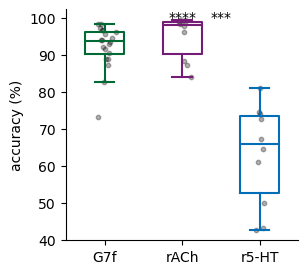

In [39]:
# plot
plt.figure(figsize = (3,3))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# g7f
the_mean = np.mean(data_g7f)
the_std = np.std(data_g7f,0,ddof = 1)/math.sqrt(len(data_g7f))
# plt.bar([0], the_mean, width=0.7,yerr = the_std,error_kw = {'ecolor' : '0.2', 'capsize' :3 },
#                      alpha=0.7,facecolor = 'white',edgecolor='#006934',linewidth=1.5)
# boxplot
plt.boxplot(data_g7f,
            medianprops={'color': '#006934', 'linewidth': '1.5'},
            # meanline=True,
            # showmeans=True,
            # meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
            showfliers=False,
            widths  = 0.5,
            positions= [0],
            boxprops = {'color': '#006934', 'linewidth': '1.5'},
            whiskerprops = {'color': '#006934', 'linewidth': '1.5'},
            capprops =  {'color': '#006934', 'linewidth': '1.5'},
            flierprops={"marker": "o", "markerfacecolor": "black","markeredgecolor":"black", "markersize": 2})
jittered_x = np.random.normal(0, 0.05, len(data_g7f)) 
ax.scatter(jittered_x, data_g7f, color='black', alpha=0.3,s = 10)

# ach
the_mean = np.mean(data_ach)
the_std = np.std(data_ach,0,ddof = 1)/math.sqrt(len(data_ach))
# plt.bar([1], the_mean, width=0.7,yerr = the_std,error_kw = {'ecolor' : '0.2', 'capsize' :3 },
#                      alpha=0.7,facecolor = 'white',edgecolor='#751C77',linewidth=1.5)
# boxplot
plt.boxplot(data_ach,
            medianprops={'color': '#751C77', 'linewidth': '1.5'},
            # meanline=True,
            # showmeans=True,
            # meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
            showfliers=False,
            widths  = 0.5,
            positions= [1],
            boxprops = {'color': '#751C77', 'linewidth': '1.5'},
            whiskerprops = {'color': '#751C77', 'linewidth': '1.5'},
            capprops =  {'color': '#751C77', 'linewidth': '1.5'},
            flierprops={"marker": "o", "markerfacecolor": "black","markeredgecolor":"black", "markersize": 2})
jittered_x = np.random.normal(1, 0.05, len(data_ach)) 
ax.scatter(jittered_x, data_ach, color='black', alpha=0.3,s = 10)
# 5ht
the_mean = np.mean(data_5ht)
the_std = np.std(data_5ht,0,ddof = 1)/math.sqrt(len(data_5ht))
# plt.bar([2], the_mean, width=0.7,yerr = the_std,error_kw = {'ecolor' : '0.2', 'capsize' :3 },
#                      alpha=0.7,facecolor = 'white',edgecolor='#036EB8',linewidth=1.5)
# boxplot
plt.boxplot(data_5ht,
            medianprops={'color': '#036EB8', 'linewidth': '1.5'},
            # meanline=True,
            # showmeans=True,
            # meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
            showfliers=False,
            widths  = 0.5,
            positions= [2],
            boxprops = {'color': '#036EB8', 'linewidth': '1.5'},
            whiskerprops = {'color': '#036EB8', 'linewidth': '1.5'},
            capprops =  {'color': '#036EB8', 'linewidth': '1.5'},
            flierprops={"marker": "o", "markerfacecolor": "black","markeredgecolor":"black", "markersize": 2})
jittered_x = np.random.normal(2, 0.05, len(data_5ht)) 
ax.scatter(jittered_x, data_5ht, color='black', alpha=0.3,s = 10)

plt.xticks([0,1,2],['G7f','rACh','r5-HT'])
plt.ylabel(filename + ' (%)')
# plt.ylim(0,100)

p_list = []
# * g7f and ach
res = mannwhitneyu(data_g7f,data_ach)
p = res.pvalue
p_list.append(p)

# * g7f and 5ht
res = mannwhitneyu(data_g7f,data_5ht)
p = res.pvalue
p_list.append(p)

# * ach and 5ht
res = mannwhitneyu(data_ach,data_5ht)
p = res.pvalue
p_list.append(p)

if if_p_corr:
    p_corrected = multipletests(p_list,method = 'fdr_bh')
    p_list = p_corrected[1]

y = 100
for i in range(len(p_list)):
    p = p_list[i]
    if p<0.05 and p>=0.01:
        plt.text(i*0.5+0.5,y,'*',verticalalignment = 'center', horizontalalignment = 'center')
    elif p<0.01 and p>0.001:
        plt.text(i*0.5+0.5,y,'**',verticalalignment = 'center', horizontalalignment = 'center')
    elif p<0.001 and p>=0.0001:
        plt.text(i*0.5+0.5,y,'***',verticalalignment = 'center', horizontalalignment = 'center') 
    elif p<0.0001:
        plt.text(i*0.5+0.5,y,'****',verticalalignment = 'center', horizontalalignment = 'center') 
p_result = []
p_result.append(p_list)

if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/' + '3g_whole_auc_channel_compare.pdf',bbox_inches = 'tight')
    plt.savefig(figure_save_path + '/' + '3g_whole_auc_channel_compare.png',bbox_inches = 'tight')
    with open(figure_save_path + '/' + '3g_whole_auc_channel_compare-p.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(p_result)
plt.show()
